# NLP - movie review sentiment analysis in python

## Data Facts and Import 
First download movie dataset from kaggle and uplod the file.

In [4]:
import pandas as pd 

Reviewdata = pd.read_csv('/train.tsv',sep='\t')

#Data Credit - https://www.kaggle.com/anu0012/hotel-review/data

In [5]:
#Reviewdata.shape
#Reviewdata.head()
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [6]:
Reviewdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PhraseId,156060.0,78030.500000,45050.785842,1.0,39015.75,78030.5,117045.25,156060.0
SentenceId,156060.0,4079.732744,2502.764394,1.0,1861.75,4017.0,6244.00,8544.0
Sentiment,156060.0,2.063578,0.893832,0.0,2.00,2.0,3.00,4.0


## Data visualization using matplotlib


Percentage for default

2    50.99
3    21.10
1    17.48
4     5.90
0     4.53
Name: Sentiment, dtype: float64


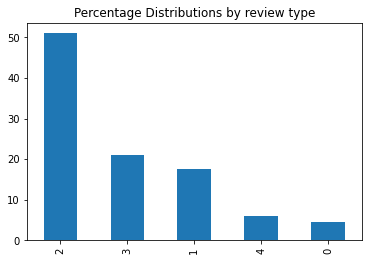

In [7]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Sentiment.value_counts(normalize=True)*100,2))
round(Reviewdata.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

#Removing columns



In [8]:
Reviewdata.drop(columns = ['PhraseId', 'SentenceId'], inplace = True)

## DATA CLEANING USING REGEX 

In [9]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [10]:
# Let's take a look at the updated text
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Phrase.apply(cleaned1))
Reviewdata.head(5)

,Phrase,Sentiment,cleaned_description
0,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...
1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...
2,A series,2,a series
3,A,2,a
4,series,2,series


In [11]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [12]:
# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(5)

,Phrase,Sentiment,cleaned_description,cleaned_description_new
0,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
2,A series,2,a series,a series
3,A,2,a,a
4,series,2,series,series


In [13]:
Reviewdata.drop(columns = ['Phrase', 'cleaned_description'], inplace = True)

## Model training 

In [14]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 140454
IV_test  : 15606
DV_train : 140454
DV_test  : 15606


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [16]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 119,   99,   11,    2,    1],
       [ 368,  993,  397,   87,   11],
       [ 181, 1597, 6998, 1510,  149],
       [  15,   87,  512, 1502,  528],
       [   0,    7,   16,  151,  265]])

## Model prediciton 

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.6328976034858388
Precision :  0.720859674869459
Recall :  0.6328976034858388


## Trying on new reviews 

In [20]:
ex=[input(("enter a string: "))]
re2=model.predict(ex)
if(re2==0):
  print("very negative")
elif (re2==1):
  print("negative")
elif (re2==2):
  print("moderate")
elif (re==3):
  print("happy")
else:
  print("very happy")

enter a string: very bad movie
very negative


In [21]:
ex=[input(("enter a string: "))]
re2=model.predict(ex)
if(re2==0):
  print("very negative")
elif (re2==1):
  print("negative")
elif (re2==2):
  print("moderate")
elif (re==3):
  print("happy")
else:
  print("very happy")

enter a string: its a very good movie
very happy
